### PART 1: INTRODUCTION

In [1]:
#If you run this notebook for the first time, uncomment the following line to install scikit-image
#!pip install scikit-image

In [33]:
from skimage import data, color
from matplotlib import pyplot as plt
import numpy as np
from skimage import morphology
from skimage.filters import try_all_threshold


#The show image function that we will use across this notebook 
def show_image(image, title='Title', cmap_type = 'gray'):
               plt.imshow(image, cmap = cmap_type)
               plt.title(title)
               plt.axis('off')
               plt.show()
            
def plot_comparison(original, filtered, title_filtered, size = (8,6)):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(size[0],size[1]), sharex = True, sharey = True)
    
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    
    ax2.imshow(filtered, cmap =plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

    
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')
    plt.show()

def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patch.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
    crop_face(result, detected)


In [3]:
original = data.rocket()
grayscale = color.rgb2gray(original)
rgb = color.gray2rgb(grayscale)

In [4]:
#The show image function that we will use across this notebook 
def show_image(image, title='Title', cmap_type = 'gray'):
               plt.imshow(image, cmap = cmap_type)
               plt.title(title)
               plt.axis('off')
               plt.show()

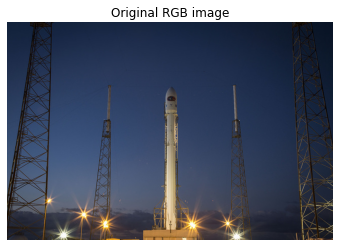

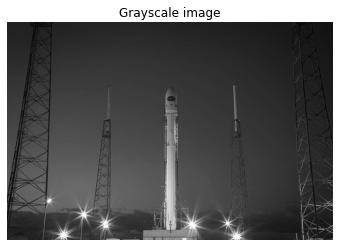

In [5]:
# Import the modules from skimage
from skimage import data, color

# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

In [6]:
coffee_image = data.coffee()
coins_image = data.coins()
np.shape(coffee_image)

(400, 600, 3)

In [7]:
np.shape(coins_image)

(303, 384)

In [8]:
#Numpy for images
#We can make some simple image processing techniques using numpy
type(coins_image) #This gives and numpy type although this is loaded as an image

numpy.ndarray

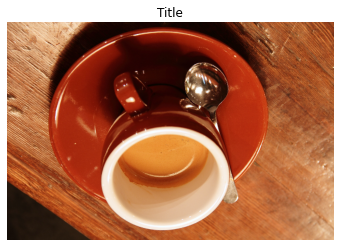

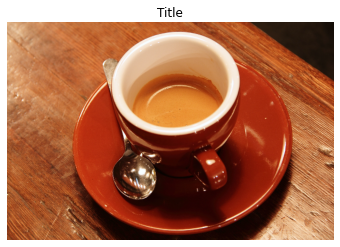

In [9]:
### Flipping images Right-Left or Upside-Down
show_image(np.flipud(coffee_image), cmap_type = 'viridis')
show_image(np.fliplr(coffee_image), cmap_type = 'viridis')

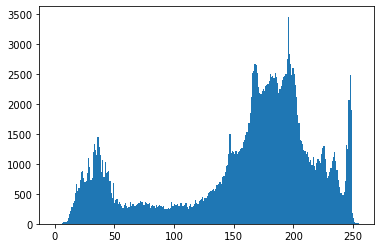

In [10]:
#Compoute the historgram
red = coffee_image[:,:,0]
plt.hist(red.ravel(), bins = 256) #The ravel method will flatten the image to an array
plt.show()

Real data sets

In [11]:
image = plt.imread('/home/agsad.admin.ch/f80859433/mnt/agroscope/Data-Work/22_Plant_Production-CH/226.21_Extension Gemüsebau/Extensionsprojekte/Applikationstechnik/Analyse/420_1_coverage_cropped.JPG')

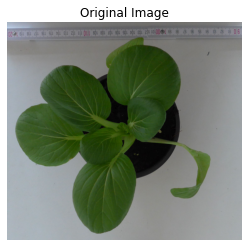

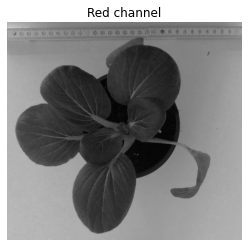

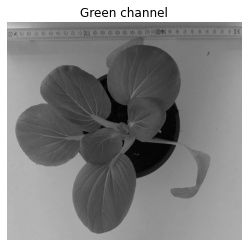

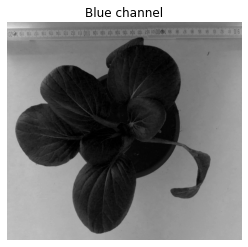

In [12]:
#Extracting the color layers

Red = image[:,:,0]
Green = image[:,:,1]
Blue = image[:,:,2]

show_image(image, 'Original Image', cmap_type = 'viridis')
show_image(Red, 'Red channel', cmap_type = 'gray')
show_image(Green, 'Green channel', cmap_type = 'gray')
show_image(Blue, 'Blue channel', cmap_type = 'gray')

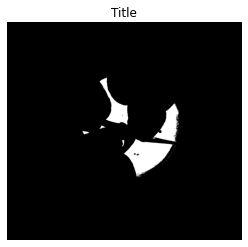

In [13]:
pot = (Red < 25) & (Green < 25) & (Blue < 25)
show_image(pot)

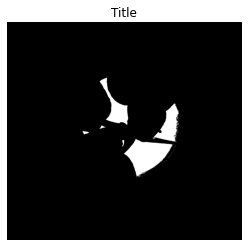

In [14]:
pot_filled = morphology.area_closing(pot, area_threshold=1000, connectivity =  2)
show_image(pot_filled)

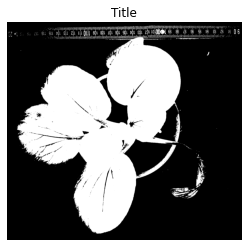

In [15]:
leaves_mask = (Green > 100)
leaves_mask = leaves_mask + pot_filled
leaves_mask = np.invert(leaves_mask)
show_image(leaves_mask)

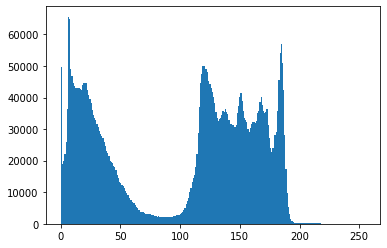

In [16]:
plt.hist(Blue.ravel(), bins = 256) #The ravel method will flatten the image to an array
plt.show()

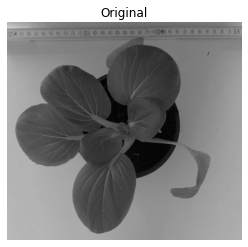

In [17]:
gray_leaves = color.rgb2gray(image)
show_image(gray_leaves, 'Original')

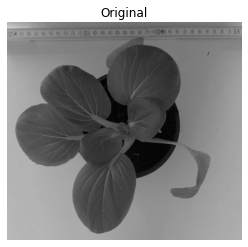

In [18]:
thresh = 50
a = gray_leaves <= 80
show_image(gray_leaves, 'Original')

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


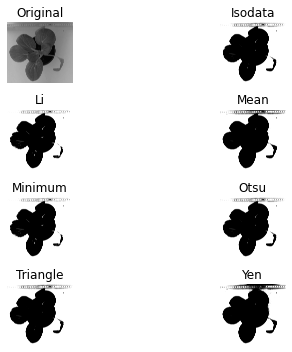

In [19]:
fig, ax = try_all_threshold(gray_leaves, verbose = 'False')

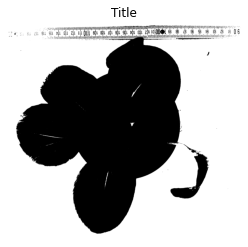

In [20]:
from skimage.filters import threshold_otsu
threshold = threshold_otsu(gray_leaves)
binary_global = gray_leaves > threshold
show_image(binary_global)

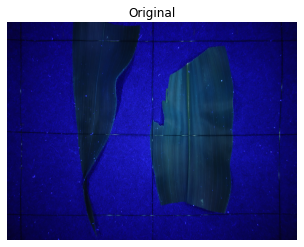

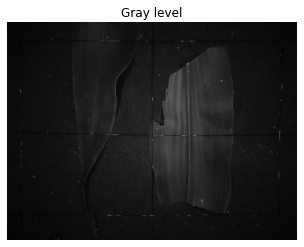

In [21]:
from skimage.filters  import threshold_local

patricles = plt.imread("/home/agsad.admin.ch/f80859433/mnt/agroscope/Data-Work/26_Agricultural_Engineering-RE/263_DP/03_Persoenliche_Unterlagen/naro/particle_tracer/data/Field_Trial/Corn/Corn_Check/DSC03224.JPG")
show_image(patricles, 'Original')

gray_particles = color.rgb2gray(patricles)
show_image(gray_particles, 'Gray level')


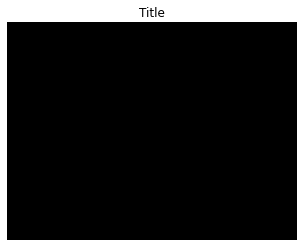

In [22]:
#Define a block size or neighborhood
block_size = 5 

local_thresh = threshold_local(gray_particles, block_size, offset = 10)

binary = gray_particles > local_thresh

show_image(binary)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 576x360 with 8 Axes>,
 array([<AxesSubplot:title={'center':'Original'}>,
        <AxesSubplot:title={'center':'Isodata'}>,
        <AxesSubplot:title={'center':'Li'}>,
        <AxesSubplot:title={'center':'Mean'}>,
        <AxesSubplot:title={'center':'Minimum'}>,
        <AxesSubplot:title={'center':'Otsu'}>,
        <AxesSubplot:title={'center':'Triangle'}>,
        <AxesSubplot:title={'center':'Yen'}>], dtype=object))

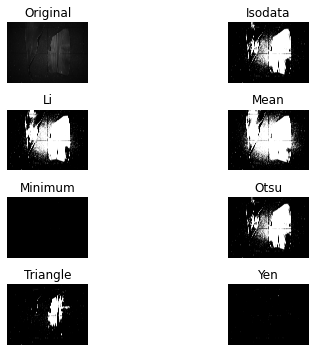

In [23]:
try_all_threshold(gray_particles, verbose = 'False')

### PART 2: FILTERING

In [24]:
from skimage.filters import sobel

edge_sobel = sobel(gray_leaves)

leaves_colored = plt.imread('/home/agsad.admin.ch/f80859433/mnt/agroscope/Data-Work/22_Plant_Production-CH/226.21_Extension Gemüsebau/Extensionsprojekte/Applikationstechnik/Analyse/420_1_coverage_cropped.JPG')
leaves_gray = color.rgb2gray(leaves_colored)

In [25]:
def plot_comparison(original, filtered, title_filtered, size = (8,6)):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(size[0],size[1]), sharex = True, sharey = True)
    
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    
    ax2.imshow(filtered, cmap =plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')
    

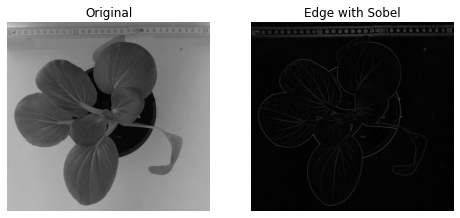

In [26]:
plot_comparison(leaves_gray, edge_sobel, 'Edge with Sobel')

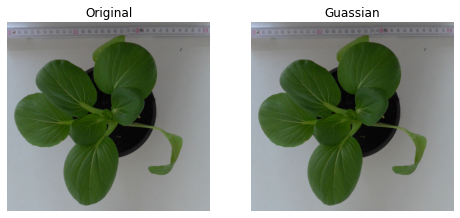

In [27]:
#Smoothing

from skimage.filters import gaussian
gaussian_image = gaussian(leaves_colored, multichannel = True)
plot_comparison(leaves_colored, gaussian_image, 'Guassian')

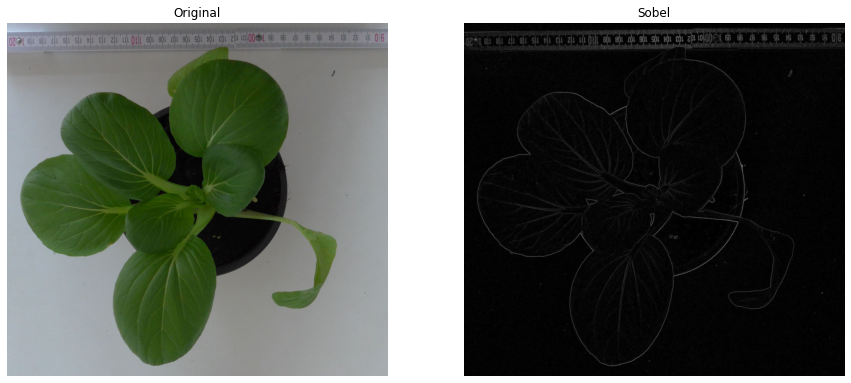

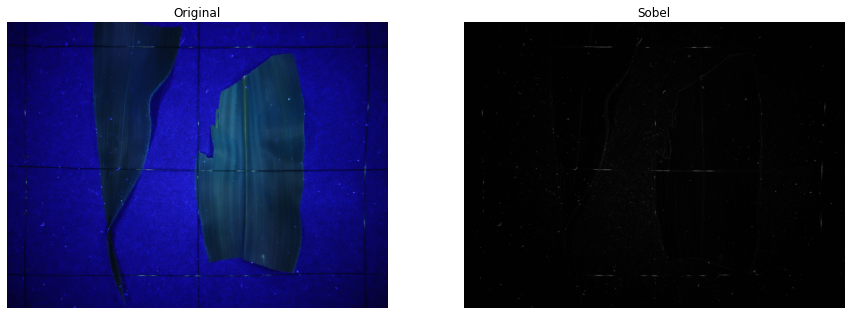

In [28]:
#Applying sobel filte to both images
from skimage.filters import sobel

leaves_colored = plt.imread('/home/agsad.admin.ch/f80859433/mnt/agroscope/Data-Work/22_Plant_Production-CH/226.21_Extension Gemüsebau/Extensionsprojekte/Applikationstechnik/Analyse/420_1_coverage_cropped.JPG')
leaves_gray = color.rgb2gray(leaves_colored)
leaves_sobel = sobel(leaves_gray)


patricles_colored = plt.imread("/home/agsad.admin.ch/f80859433/mnt/agroscope/Data-Work/26_Agricultural_Engineering-RE/263_DP/03_Persoenliche_Unterlagen/naro/particle_tracer/data/Field_Trial/Corn/Corn_Check/DSC03224.JPG")
particles_gray = color.rgb2gray(patricles_colored)
particles_sobel = sobel(particles_gray)

plot_comparison(leaves_colored, leaves_sobel, 'Sobel', size = (15,10))
plot_comparison(patricles_colored, particles_sobel, 'Sobel', size = (15,10))

### Part III - Image Enhancement

In [29]:
#To improve the contract (increasing the dynamic range), we can apply either contrast streching or histogram equalization

# 3 types of histogram equilization: standard, adaptive and limited adaptive (CLAHE)
from skimage import exposure

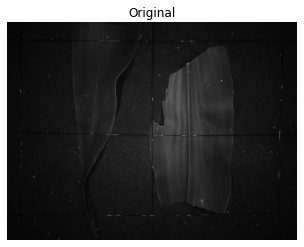

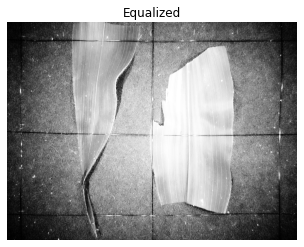

In [30]:
particles_gray_enhanced = exposure.equalize_hist(particles_gray)
show_image(particles_gray, 'Original')
show_image(particles_gray_enhanced, 'Equalized')

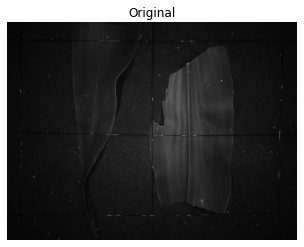

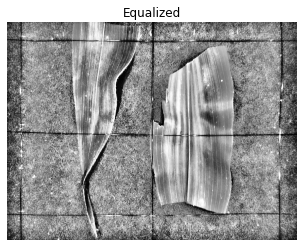

In [31]:
#Trial with Adaptive Filtering
particles_gray_enhanced = exposure.equalize_adapthist(particles_gray, clip_limit =0.7)
show_image(particles_gray, 'Original')
show_image(particles_gray_enhanced, 'Equalized')

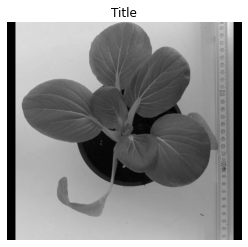

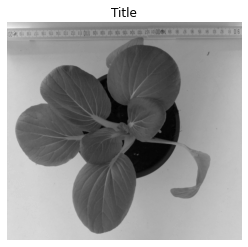

In [32]:
### Part IV - Transformation
# Sometimes, we need to transform images as a part of the pre-processing step in image processing. This can be rotation, resizing, ....

from skimage.transform import rotate, rescale, resize

leaves_colored = plt.imread('/home/agsad.admin.ch/f80859433/mnt/agroscope/Data-Work/22_Plant_Production-CH/226.21_Extension Gemüsebau/Extensionsprojekte/Applikationstechnik/Analyse/420_1_coverage_cropped.JPG')
leaves_gray = color.rgb2gray(leaves_colored)
rotated_leaves = rotate(leaves_gray , -90) # Positive ==> Anticlockwise
scaled_leaves = rescale(leaves_gray, 1/4, anti_aliasing=True, multichannel = False)
show_image(rotated_leaves)
show_image(scaled_leaves)


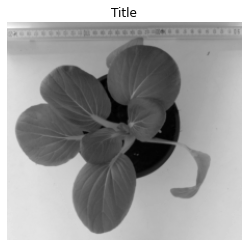

In [33]:
h = np.floor(leaves_gray.shape[0]/10)
w = np.floor(leaves_gray.shape[1]/10)
resized_leaves = resize(leaves_gray, (h, w))

show_image(resized_leaves)

In [34]:
### Part IV - Morphology
# Morpholigacial operations operates on binary images (that often results from thresholding)
# Erosion: removes pixels from boundaries, while dilation does the opposite
from skimage import morphology

square = morphology.square(4) # Creating a square structuring element of size 4
square = morphology.rectangle(4, 2) # Creating a square structuring element of size 4x2



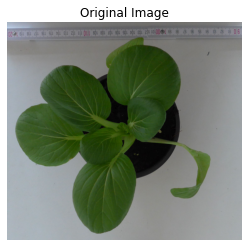

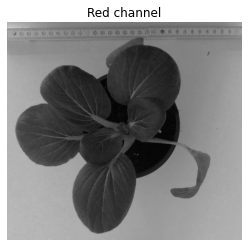

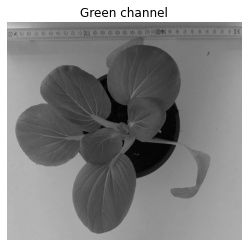

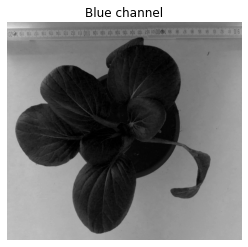

In [35]:
#Extracting the color layers

Red = leaves_colored[:,:,0]
Green = leaves_colored[:,:,1]
Blue = leaves_colored[:,:,2]

show_image(leaves_colored, 'Original Image', cmap_type = 'viridis')
show_image(Red, 'Red channel', cmap_type = 'gray')
show_image(Green, 'Green channel', cmap_type = 'gray')
show_image(Blue, 'Blue channel', cmap_type = 'gray')

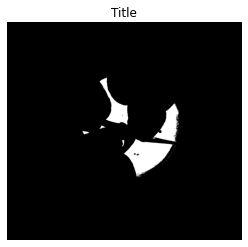

In [36]:
pot = (Red < 25) & (Green < 25) & (Blue < 25)
show_image(pot)

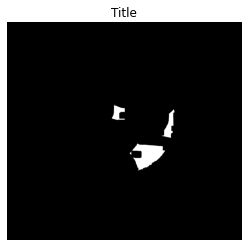

In [37]:
square = morphology.square(50) # Creating a square structuring element of size 4

eroded_image = morphology.binary_erosion(pot, square)
show_image(eroded_image)

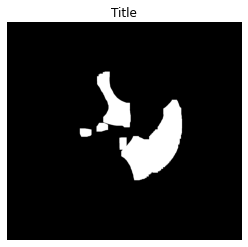

In [38]:
square = morphology.square(50) # Creating a square structuring element of size 4

dilated_image = morphology.binary_dilation(pot, square)
show_image(dilated_image)

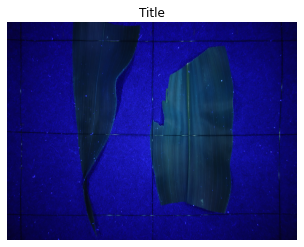

In [39]:
### Part V -  Image Restauration
from skimage.restoration import inpaint

patricles_colored = plt.imread("/home/agsad.admin.ch/f80859433/mnt/agroscope/Data-Work/26_Agricultural_Engineering-RE/263_DP/03_Persoenliche_Unterlagen/naro/particle_tracer/data/Field_Trial/Corn/Corn_Check/DSC03224.JPG")

show_image(patricles_colored)
mask = np.zeros(patricles_colored.shape[:-1])
mask[290:320, :] = 1

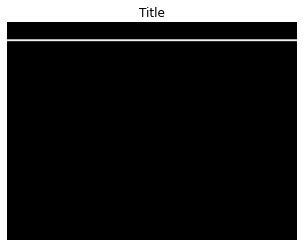

In [40]:
show_image(mask)

In [ ]:
from skimage.restoration import inpaint

patricles_colored = plt.imread("/home/agsad.admin.ch/f80859433/mnt/agroscope/Data-Work/26_Agricultural_Engineering-RE/263_DP/03_Persoenliche_Unterlagen/naro/particle_tracer/data/Field_Trial/Corn/Corn_Check/DSC03224.JPG")

image_restored = inpaint.inpaint_biharmonic(patricles_colored, mask, multichannel=True)

In [ ]:
show_image(image_restored)

In [2]:
# Adding and removing noise

from skimage.util import random_noise

# We can remove noise using many fonctions from the module restoration (such as denoise_bilateral and denoise_tv_chambolle)

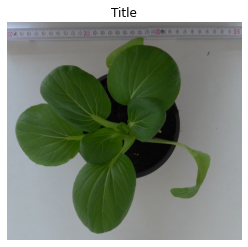

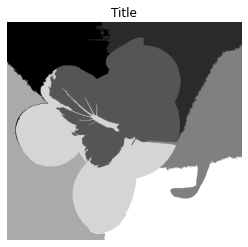

In [37]:
### Part V -  Segmentation

# A superpixel is a group of pixels that have similar gray level or texture
# Segmentation techniques are supervised (we tell the algorithm about the threshold) and non supervised (the algorithm should determine the threshold, like Otsu and SLIC(simple linear iterative clustering))
# SLIC segments the image into a predefined number of subregion using the kmeans clustering.

from skimage.segmentation import slic
from skimage.color import label2rgb

leaves_colored = plt.imread('/home/agsad.admin.ch/f80859433/mnt/agroscope/Data-Work/22_Plant_Production-CH/226.21_Extension Gemüsebau/Extensionsprojekte/Applikationstechnik/Analyse/420_1_coverage_cropped.JPG')
leaves_gray = color.rgb2gray(leaves_colored)
segments = slic(leaves_colored, start_label =  1, n_segments = 8)

show_image(leaves_colored)
show_image(segments)



/tmp/ipykernel_463/3308208555.py:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  show_image(label2rgb(segments, leaves_colored, kind='avg'))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


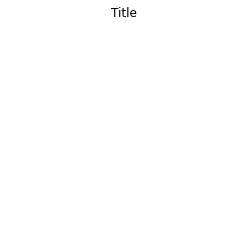

In [38]:
#Refurbish this function and why it does not work
show_image(label2rgb(segments, leaves_colored, kind='avg'))


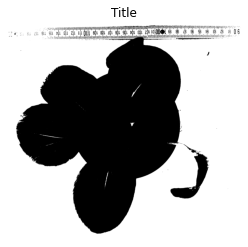

In [22]:
#Finding contours
from skimage.filters import threshold_otsu
from skimage import measure
threshold = threshold_otsu(leaves_gray)
thres_image = leaves_gray > threshold
show_image(thres_image)

In [37]:
contours = measure.find_contours(thres_image, 0.1) # The 0.8 is the sensitivity parameters. The highest, the sensitive, the more contours would be detected

# Listing all contours

#for contour in cont:
#    print(contour.shape)

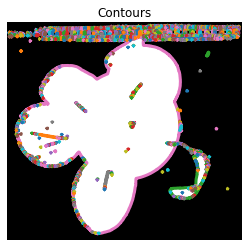

Dice's dots number: 1007. 


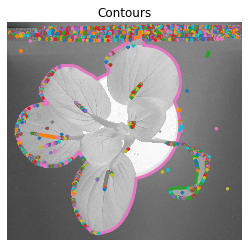

In [39]:

# Set 50 as the maximum size of the dots shape
max_dots_shape = 20

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contour(thres_image, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))
show_image_contour(leaves_gray, cont)


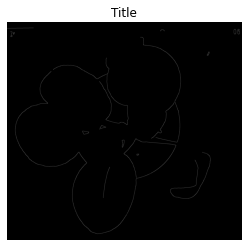

In [46]:
#Finding edges with Canny edge detector

from skimage.feature import canny

canny_image = canny(leaves_gray, sigma = 3) # The sigma is the gaussian filter effect at the first step of the canny edge detector
show_image(canny_image)

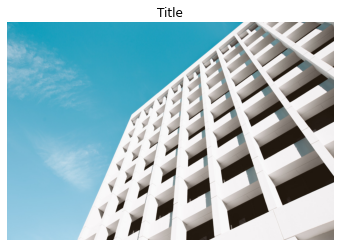

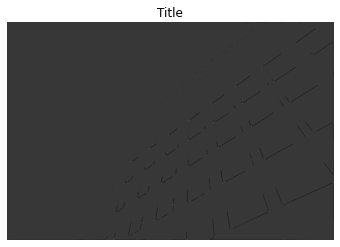

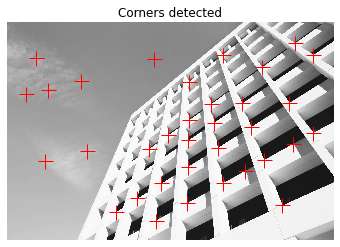

In [10]:
#Corner detection (very useful in computer vision and image registration)

from skimage.feature import corner_harris, corner_peaks
from skimage import data

# Try the same manouver with buildings.JPG and buildings1.JPG
building = plt.imread('/home/agsad.admin.ch/f80859433/mnt/agroscope/Data-Work/26_Agricultural_Engineering-RE/263_DP/03_Persoenliche_Unterlagen/naro/particle_tracer/example_images/buildings2.JPG')
building_gray = color.rgb2gray(building)
measure_image = corner_harris(building_gray)

show_image(building)
show_image(measure_image)

#finding the coordinates of the corners
coordinates = corner_peaks(measure_image, min_distance = 100) # Do not make this very low because it will fill the whole image with crosses and takes a while to display
show_image_with_corners(building_gray, coordinates)

In [35]:
### Part VI - Face Detection (useful for privacy and face detection, emotion detection .... )
# Skimage Uses a cascae of classifiers

from skimage.feature import Cascade

trained_file = data.lbp_frontal_face_cascade_filename()

detector = Cascade(trained_file)


face1 = plt.imread('/home/agsad.admin.ch/f80859433/mnt/agroscope/Data-Work/26_Agricultural_Engineering-RE/263_DP/03_Persoenliche_Unterlagen/naro/particle_tracer/example_images/face1.JPG')
face2 = plt.imread('/home/agsad.admin.ch/f80859433/mnt/agroscope/Data-Work/26_Agricultural_Engineering-RE/263_DP/03_Persoenliche_Unterlagen/naro/particle_tracer/example_images/face2.JPG')
face3 = plt.imread('/home/agsad.admin.ch/f80859433/mnt/agroscope/Data-Work/26_Agricultural_Engineering-RE/263_DP/03_Persoenliche_Unterlagen/naro/particle_tracer/example_images/face2.JPG')


AttributeError: 'dict' object has no attribute 'Rectangle'

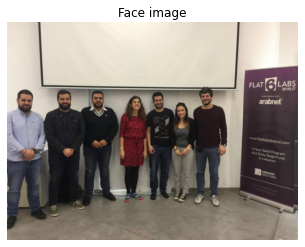

In [36]:
detected1 = detector.detect_multi_scale(img = face1, scale_factor = 1.2, step_ratio = 1, min_size = (10, 10), max_size = (200,200))

show_detected_face(face2, detected1)

#There is an error in this function, refurbish it according to https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html